# Playing around



In [14]:
from PIL import Image, ImageStat
import numpy as np


In [3]:
clear = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000000.png"
KnitCap = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/KnitCap/KnitCap_000002.png"

In [11]:
def brightness( im_file ):
   im = Image.open(im_file).convert('L')
   stat = ImageStat.Stat(im)
   return stat.rms[0]

In [12]:
brightness( clear )

112.56687975392549

In [13]:
brightness( KnitCap )

83.34214998209559

In [21]:
# Open the images

image1     = Image.open( clear )

image2     = Image.open( KnitCap )

 

# Get the image buffer as ndarray

buffer1    = np.asarray(image1)

buffer2    = np.asarray(image2)

 

# Subtract image2 from image1

buffer3    =  buffer2 - buffer1

 

# Construct a new Image from the resultant buffer

differenceImage     = Image.fromarray(buffer3)

 

# Display all the images including the difference image

image1.show()

image2.show()

differenceImage.show()

In [22]:
# Load image as greyscale and calculate histogram
im = Image.open( clear ).convert('L')
h = im.histogram()

# Print histogram
for idx, val in enumerate(h):
    print(idx,val)

0 805
1 4183
2 6548
3 7925
4 10258
5 11619
6 12894
7 15777
8 18342
9 19198
10 18786
11 18286
12 18702
13 17858
14 16946
15 16010
16 15213
17 14581
18 13667
19 12514
20 11892
21 11090
22 10602
23 10226
24 10187
25 10150
26 9718
27 9488
28 9979
29 10405
30 18066
31 40287
32 21069
33 13450
34 13145
35 15096
36 14643
37 12840
38 11802
39 11693
40 12068
41 13450
42 15288
43 19270
44 28219
45 37845
46 32679
47 19717
48 11029
49 8172
50 7712
51 7195
52 7487
53 7296
54 6679
55 6146
56 6037
57 5513
58 5437
59 5364
60 5336
61 5457
62 5418
63 5349
64 5278
65 5149
66 5443
67 5317
68 5650
69 5611
70 6163
71 6534
72 7327
73 7817
74 8179
75 8753
76 8660
77 8612
78 8823
79 8598
80 9030
81 8877
82 8921
83 9081
84 9109
85 9462
86 9535
87 10362
88 10109
89 10751
90 10567
91 10963
92 11328
93 11780
94 12327
95 12784
96 13549
97 14008
98 14442
99 14839
100 15163
101 15500
102 16217
103 16441
104 17257
105 17421
106 17850
107 17710
108 17825
109 17903
110 17531
111 16766
112 16700
113 16013
114 15389
115 14

The code below works and is a starting point for showing the difference in brightness between two images.

In [13]:
image1 = Image.open( clear ).convert('L')
image2 = Image.open( KnitCap ).convert('L')

buffer1    = np.asarray(image1)

buffer2    = np.asarray(image2)

# Subtract image2 from image1

buffer3    =  buffer2 - buffer1

# Construct a new Image from the resultant buffer

differenceImage     = Image.fromarray(buffer3)

# Display all the images including the difference image

image1.show()

image2.show()

differenceImage.show()

The following normalising method qorks quite well. The only thing is the background still appears (since it is normalised differently for each image) so it we should find the edges from the resultant picture or the intermediate pictures.

Only works well when images are basically the same angle. Need to work on image registration.

In [10]:

def normalize(image):
    std_img = np.min(image) / (np.max(image) - np.min(image))
    return (image - std_img)

In [11]:
image1 = Image.open( clear ).convert('L')
image2 = Image.open( KnitCap ).convert('L')

buffer1    = np.asarray(image1)
buffer1 = normalize(buffer1)

buffer2    = np.asarray(image2)
buffer2 = normalize(buffer2)

# Subtract image2 from image1

buffer3    =  buffer2 - buffer1

# Construct a new Image from the resultant buffer

image1 = Image.fromarray(buffer1)
image2 = Image.fromarray(buffer2)
differenceImage     = Image.fromarray(buffer3)

# Display all the images including the difference image

image1.show()

image2.show()

differenceImage.show()

In [1]:
import pyvips

x = pyvips.Image.new_from_file( clear )
x = x.hist_equal()
x.write_to_file("x.jpg")

ModuleNotFoundError: No module named 'pyvips'

In [1]:
from skimage import data, io
import matplotlib as plt
image = io.imread( clear )  

std_img = np.min(image) / (np.max(image) - np.min(image))
norm_image = (image - std_img)
plt.imshow(norm_image)

ModuleNotFoundError: No module named 'matplotlib'

# Histograms 

NB: Changed environment since anaconda has been playing up.

In [2]:
import imageio.v3 as iio
import numpy as np
import skimage.color
import skimage.util
import matplotlib.pyplot as plt



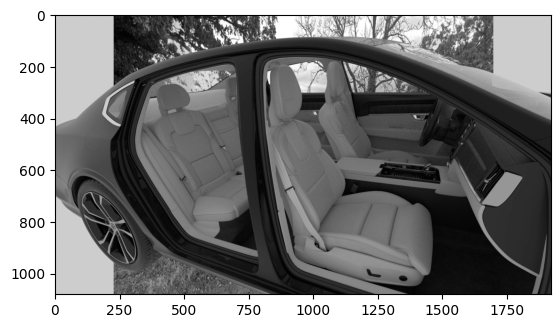

In [44]:
clear = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000000.png"
KnitCap = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/KnitCap/KnitCap_000002.png"
image = iio.imread(uri=clear, mode="L")

# convert the image to float dtype with a value range from 0 to 1
image = skimage.util.img_as_float(image)

# display the image
fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")

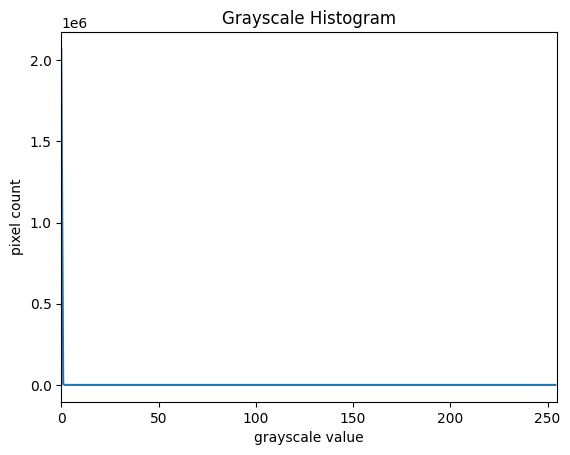

In [45]:
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 255.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here

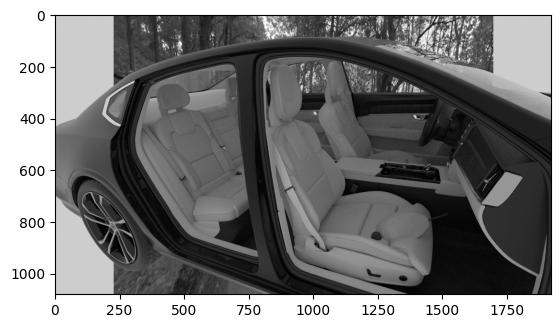

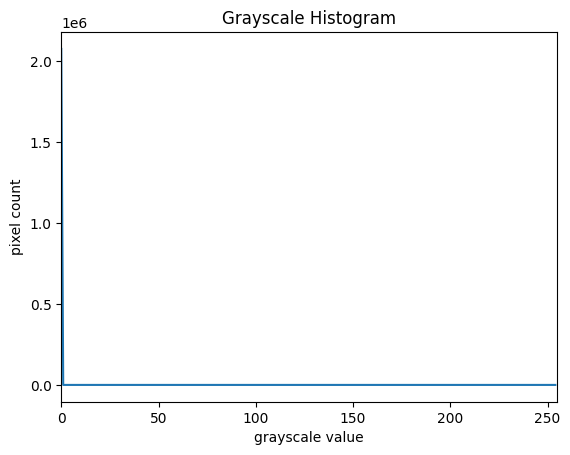

In [42]:
clear = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000000.png"
KnitCap = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/KnitCap/KnitCap_000002.png"
image = iio.imread(uri=KnitCap, mode="L")

# convert the image to float dtype with a value range from 0 to 1
image = skimage.util.img_as_float(image)

# display the image
fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 255.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here

Subtracting the two histograms from one another and plotting results in nothing!

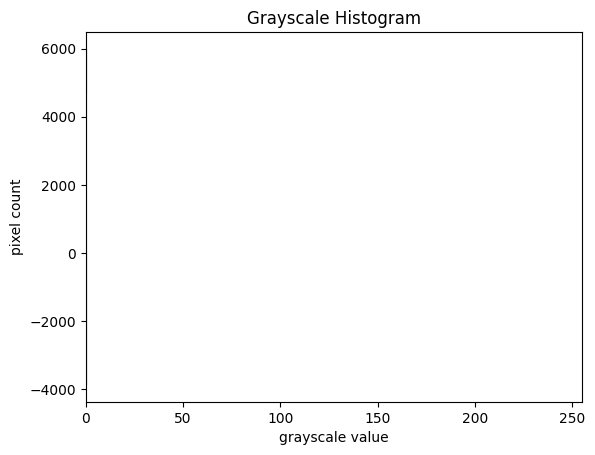

In [53]:
clear = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000000.png"
KnitCap = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/KnitCap/KnitCap_000002.png"

image1 = Image.open( clear ).convert('L')
image2 = Image.open( KnitCap ).convert('L')

buffer1    = np.asarray(image1)
#buffer1 = normalize(buffer1)

buffer2    = np.asarray(image2)
#buffer2 = normalize(buffer2)

image3 = abs(buffer2-buffer1)


histogram1, bin_edges1 = np.histogram(image1, bins=256, range=(0, 255))
histogram2, bin_edges2 = np.histogram(image2, bins=256, range=(0, 255))

histogram3 = histogram1 - histogram2
bin_edges3 = bin_edges1 - bin_edges2

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 255.0])
plt.plot(bin_edges3[0:-1], histogram3)

In [54]:
image3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Plotting a histogram comparing two of the same image.

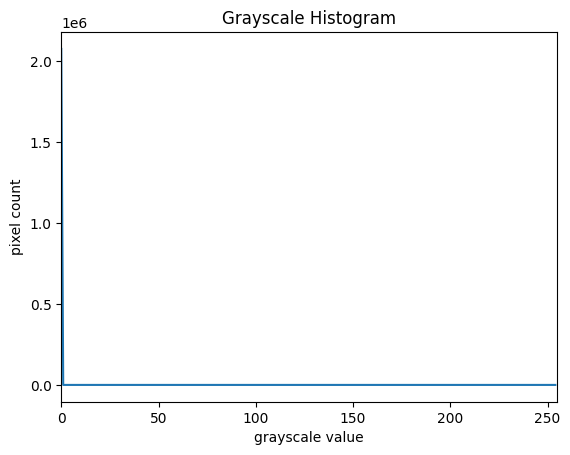

In [37]:

clear = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000000.png"
KnitCap = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/KnitCap/KnitCap_000000.png"


def normalize(image):
    std_img = np.min(image) / (np.max(image) - np.min(image))
    return (image - std_img)

image1 = Image.open( clear ).convert('L')
image2 = Image.open( clear ).convert('L')

buffer1    = np.asarray(image1)
buffer1 = normalize(buffer1)

buffer2    = np.asarray(image2)
buffer2 = normalize(buffer2)

# Subtract image2 from image1

buffer3    =  buffer2 - buffer1
differenceImage     = Image.fromarray(buffer3)
differenceImage.show()

# histogram

histogram, bin_edges = np.histogram(buffer3, bins=256, range=(0, 255))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 255])
plt.plot(bin_edges[0:-1], histogram)

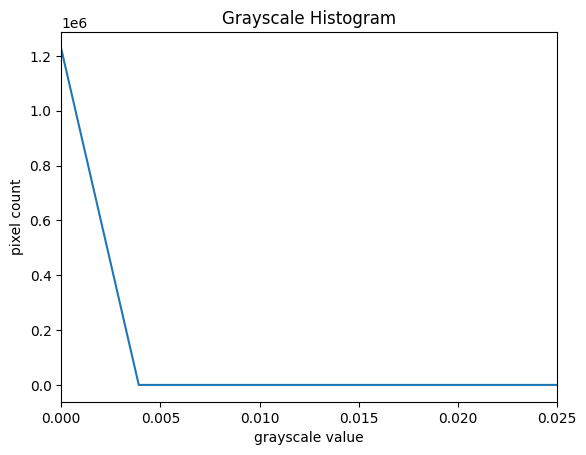

In [26]:

clear = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000000.png"
KnitCap = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/KnitCap/KnitCap_000002.png"


def normalize(image):
    std_img = np.min(image) / (np.max(image) - np.min(image))
    return (image - std_img)

image1 = Image.open( clear ).convert('L')
image2 = Image.open( KnitCap ).convert('L')


buffer1    = np.asarray(image1)
buffer1 = normalize(buffer1)

buffer2    = np.asarray(image2)
buffer2 = normalize(buffer2)

# Subtract image2 from image1

buffer3    =  buffer2 - buffer1
differenceImage     = Image.fromarray(buffer3)
differenceImage.show()

# histogram

histogram, bin_edges = np.histogram(buffer3, bins=256, range=(0, 255.0))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 255.0])
plt.plot(bin_edges[0:-1], histogram)

Applying a mask.

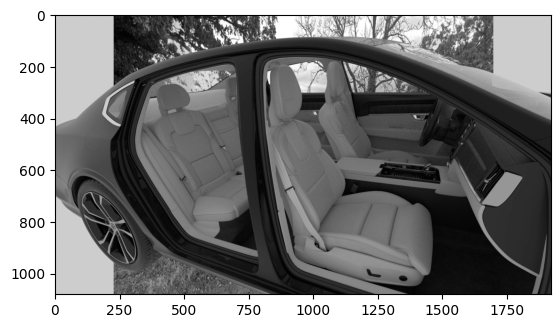

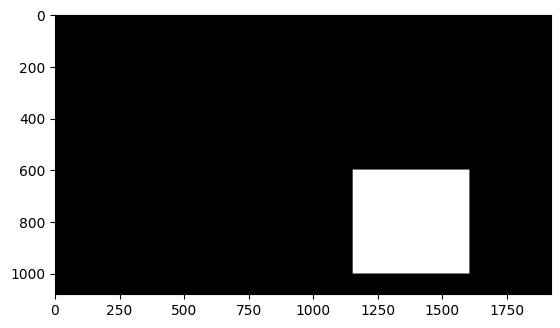

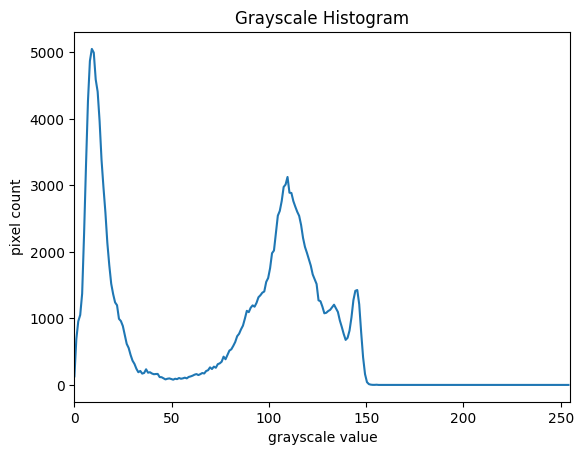

In [73]:
clear = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000000.png"
KnitCap = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/KnitCap/KnitCap_000002.png"
# read the image as grayscale from the outset
image = iio.imread(uri=clear, mode="L")

# display the image
fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")

# create mask here, using np.zeros() and skimage.draw.rectangle()
mask = np.zeros(shape=image.shape, dtype="bool")
rr, cc = skimage.draw.rectangle(start=(600, 1150), end=(1000, 1600))
mask[rr, cc] = True

# display the mask
fig, ax = plt.subplots()
plt.imshow(mask, cmap="gray")

# mask the image and create the new histogram
histogram1, bin_edges1 = np.histogram(image[mask], bins=256, range=(0.0, 255.0))

# configure and draw the histogram figure
plt.figure()

plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 255.0])
plt.plot(bin_edges1[0:-1], histogram1)

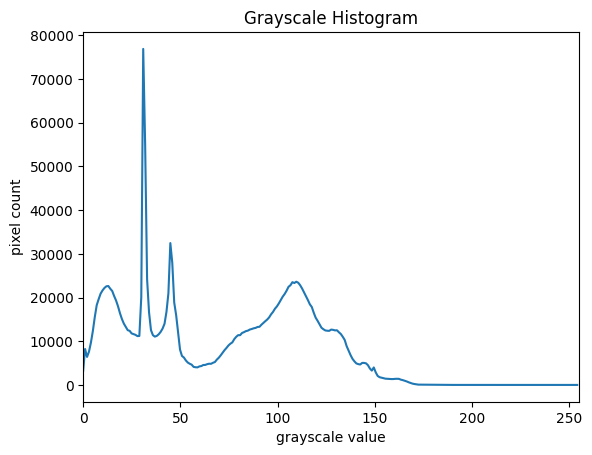

In [72]:

KnitCap = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/KnitCap/KnitCap_000000.png"
# read the image as grayscale from the outset
image = iio.imread(uri=KnitCap, mode="L")

# display the image
#fig, ax = plt.subplots()
#plt.imshow(image, cmap="gray")

# create mask here, using np.zeros() and skimage.draw.rectangle()
# mask = np.zeros(shape=image.shape, dtype="bool")
# rr, cc = skimage.draw.rectangle(start=(600, 1150), end=(1000, 1600))
# mask[rr, cc] = True

# display the mask
# fig, ax = plt.subplots()
# plt.imshow(mask, cmap="gray")

# mask the image and create the new histogram
#histogram1, bin_edges1 = np.histogram(image[mask], bins=256, range=(0.0, 255.0))
histogram1, bin_edges1 = np.histogram(image, bins=256, range=(0.0, 255.0))

# configure and draw the histogram figure
plt.figure()

plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 255.0])
plt.plot(bin_edges1[0:-1], histogram1)

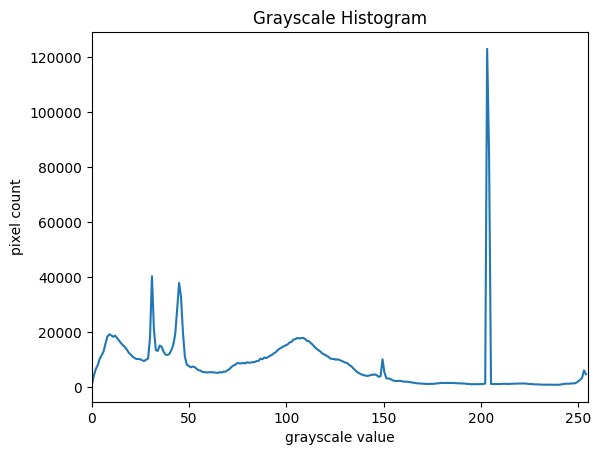

In [75]:
clear = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000000.png"

image = iio.imread(uri=clear, mode="L")
histogram2, bin_edges2 = np.histogram(image, bins=256, range=(0.0, 255.0))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 255.0])
plt.plot(bin_edges2[0:-1], histogram2)

In [76]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(histogram1, histogram2)


In [77]:
r_value

0.3272760719134278

R-squared for two clear images

In [83]:
clear = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000000.png"
clear2 = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000007.png"


image = iio.imread(uri=clear, mode="L")
histogram1, bin_edges1 = np.histogram(image, bins=256, range=(0.0, 255.0))


image2 = iio.imread(uri=clear2, mode="L")
histogram2, bin_edges2 = np.histogram(image2, bins=256, range=(0.0, 255.0))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(histogram1, histogram2)

r_value

0.4631301666291145

R-sqaured value for clear and knitcap

In [89]:
clear = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/clear/000000.png"
KnitCap = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/test/KnitCap/KnitCap_000002.png"


image = iio.imread(uri=clear, mode="L")
histogram1, bin_edges1 = np.histogram(image, bins=256, range=(0.0, 255.0))


image2 = iio.imread(uri=clear2, mode="L")
histogram2, bin_edges2 = np.histogram(image2, bins=256, range=(0.0, 255.0))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(histogram1, histogram2)

r_value

0.4631301666291145

Observations:
- Better idea if similar when apply a mask?
- Will need to perform image registration